In [674]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [675]:
human_annotations = pd.read_csv("Human_annotations.csv", encoding='ISO-8859-1')
LLM_annotations_gpt_4 = pd.read_csv("LLM_annotations_gpt_4.csv")
LLM_annotations_gpt_4o_mini = pd.read_csv("LLM_annotations_gpt-4o-mini.csv")

In [676]:
human_annotations.head()

,index,name,url,review,Battery Life,Build Quality and Durability,Comfort and Fit,Features and Functionality,Sound Quality,Value for Money
0,1,"JBL Tune 510BT, On Ear Wireless Headphones wit...",https://www.amazon.in/JBL-Wireless-Headphones-...,"Noise cancellation feature is awesome, The mus...",0,0,0,1,1,0
1,2,"JBL Tune 510BT, On Ear Wireless Headphones wit...",https://www.amazon.in/JBL-Wireless-Headphones-...,Writing this review after 2 days of usage:Audi...,0,1,1,1,1,0
2,3,"JBL Tune 510BT, On Ear Wireless Headphones wit...",https://www.amazon.in/JBL-Wireless-Headphones-...,I can't believe I almost cancelled this produc...,0,0,1,0,1,0
3,4,"JBL Tune 510BT, On Ear Wireless Headphones wit...",https://www.amazon.in/JBL-Wireless-Headphones-...,"I placed order and by evening, I opened box an...",0,0,1,1,1,0
4,5,"Sony WH-CH520, Wireless On-Ear Bluetooth Headp...",https://www.amazon.in/Sony-Bluetooth-Headphone...,So if you're considering to buy this pair of h...,1,0,1,1,1,1


In [677]:
LLM_annotations_gpt_4.head()

,Unnamed: 0,name,url,review,Battery Life,Build Quality and Durability,Comfort and Fit,Features and Functionality,Sound Quality,Value for Money
0,0,"JBL Tune 510BT, On Ear Wireless Headphones wit...",https://www.amazon.in/JBL-Wireless-Headphones-...,"Noise cancellation feature is awesome, The mus...",0,0,0,1,1,0
1,1,"JBL Tune 510BT, On Ear Wireless Headphones wit...",https://www.amazon.in/JBL-Wireless-Headphones-...,Writing this review after 2 days of usage:Audi...,0,1,1,1,1,0
2,2,"JBL Tune 510BT, On Ear Wireless Headphones wit...",https://www.amazon.in/JBL-Wireless-Headphones-...,I can't believe I almost cancelled this produc...,0,0,1,1,1,0
3,3,"JBL Tune 510BT, On Ear Wireless Headphones wit...",https://www.amazon.in/JBL-Wireless-Headphones-...,"I placed order and by evening, I opened box an...",0,1,1,1,1,0
4,4,"Sony WH-CH520, Wireless On-Ear Bluetooth Headp...",https://www.amazon.in/Sony-Bluetooth-Headphone...,So if you're considering to buy this pair of h...,1,1,1,1,1,1


In [678]:
LLM_annotations_gpt_4o_mini.head()

,Unnamed: 0,name,url,review,Battery Life,Build Quality and Durability,Comfort and Fit,Features and Functionality,Sound Quality,Value for Money
0,0,"JBL Tune 510BT, On Ear Wireless Headphones wit...",https://www.amazon.in/JBL-Wireless-Headphones-...,"Noise cancellation feature is awesome, The mus...",0,0,0,1,1,0
1,1,"JBL Tune 510BT, On Ear Wireless Headphones wit...",https://www.amazon.in/JBL-Wireless-Headphones-...,Writing this review after 2 days of usage:Audi...,0,1,1,1,1,0
2,2,"JBL Tune 510BT, On Ear Wireless Headphones wit...",https://www.amazon.in/JBL-Wireless-Headphones-...,I can't believe I almost cancelled this produc...,0,0,1,1,1,1
3,3,"JBL Tune 510BT, On Ear Wireless Headphones wit...",https://www.amazon.in/JBL-Wireless-Headphones-...,"I placed order and by evening, I opened box an...",0,1,0,1,0,0
4,4,"Sony WH-CH520, Wireless On-Ear Bluetooth Headp...",https://www.amazon.in/Sony-Bluetooth-Headphone...,So if you're considering to buy this pair of h...,1,1,1,1,1,1


## Analysis

In [679]:
human_data_count = {}
for label in human_annotations[['Battery Life','Build Quality and Durability', 'Comfort and Fit','Features and Functionality', 'Sound Quality', 'Value for Money',]]:
    human_data_count[label] =  int(human_annotations[label].sum())

In [680]:
llm_data_count_gpt4 = {}
for label in LLM_annotations_gpt_4[['Battery Life','Build Quality and Durability', 'Comfort and Fit','Features and Functionality', 'Sound Quality', 'Value for Money',]]:
    llm_data_count_gpt4[label] =  int(LLM_annotations_gpt_4[label].sum())

In [681]:
llm_data_count_gpt_4o_mini = {}
for label in LLM_annotations_gpt_4[['Battery Life','Build Quality and Durability', 'Comfort and Fit','Features and Functionality', 'Sound Quality', 'Value for Money',]]:
    llm_data_count_gpt_4o_mini[label] =  int(LLM_annotations_gpt_4o_mini[label].sum())

/var/folders/r_/5nhh3cjx6_bc8q0z01s7fp040000gn/T/ipykernel_20808/4159235792.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


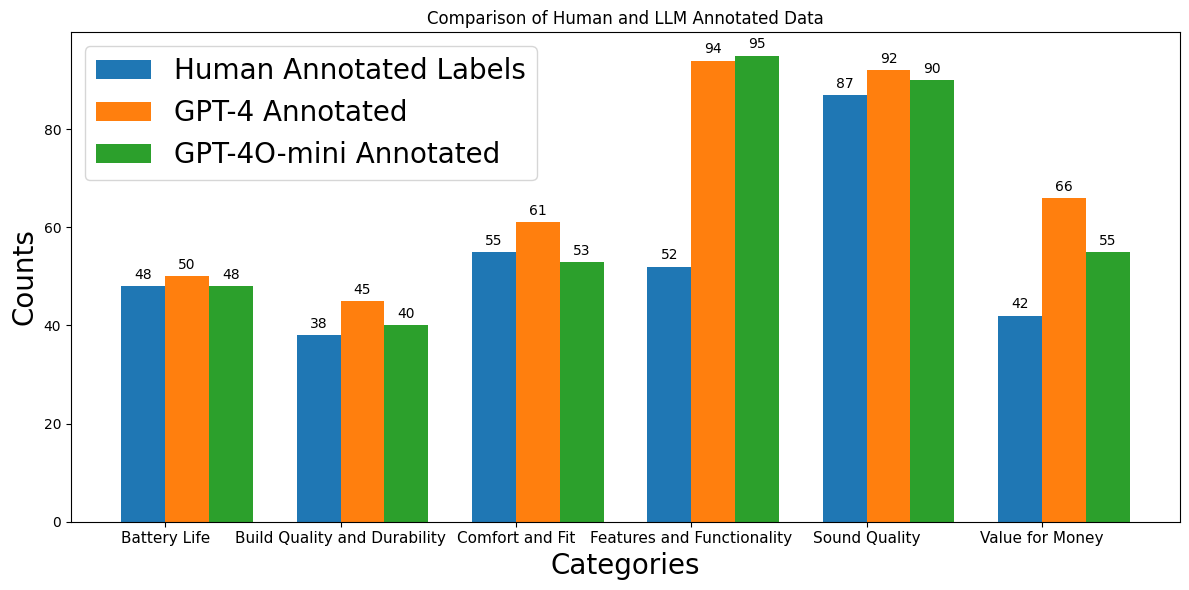

<Figure size 640x480 with 0 Axes>

In [ ]:
categories = list(human_data_count.keys())
human_values = list(human_data_count.values())
llm_values_gpt_4 = list(llm_data_count_gpt4.values())
llm_values_gpt_4o_mini = list(llm_data_count_gpt_4o_mini.values())

# Took reference from: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
data = {'Human Annotated Labels': human_values,'GPT-4 Annotated': llm_values_gpt_4, 'GPT-4O-mini Annotated': llm_values_gpt_4o_mini}
x = np.arange(len(categories)) 
width = 0.25 
multiplier = 0
fig, ax = plt.subplots(layout='constrained', figsize=(12, 6))
for label, values in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, values, width, label=label)
    ax.bar_label(rects, padding=3)
    multiplier += 1
ax.set_ylabel('Counts', fontsize=20)
ax.set_xlabel('Categories', fontsize=20)
ax.set_title('Comparison of Human and LLM Annotated Data', fontsize=20)
ax.set_xticks(x + width / 2, categories, fontsize=11)
ax.legend(loc='best', fontsize=20)
plt.tight_layout()
plt.show()
plt.savefig('Frequency plot.png')


### Confusion matrix and precision

#### Human Annotated Data and LLM (Gpt-4) Annotated data

In [655]:
battery_life_confusion_matrix = metrics.confusion_matrix(human_annotations['Battery Life'], LLM_annotations_gpt_4['Battery Life'])
build_quality_confusion_matrix = metrics.confusion_matrix(human_annotations['Build Quality and Durability'], LLM_annotations_gpt_4['Build Quality and Durability'])
comfort_fit_confusion_matrix = metrics.confusion_matrix(human_annotations['Comfort and Fit'], LLM_annotations_gpt_4['Comfort and Fit'])
features_confusion_matrix = metrics.confusion_matrix(human_annotations['Features and Functionality'], LLM_annotations_gpt_4['Features and Functionality'])
sound_quality_confusion_matrix = metrics.confusion_matrix(human_annotations['Sound Quality'], LLM_annotations_gpt_4['Sound Quality'])
vfm_confusion_matrix = metrics.confusion_matrix(human_annotations['Value for Money'], LLM_annotations_gpt_4['Value for Money'])

print(f"Battery Life: \n{battery_life_confusion_matrix}")
print(f"Build Quality and Durability: \n{build_quality_confusion_matrix}")
print(f"Comfort and Fit: \n{comfort_fit_confusion_matrix}")
print(f"Features and Functionality: \n{features_confusion_matrix}")
print(f"Sound Quality: \n{sound_quality_confusion_matrix}")
print(f"Value for Money: \n{vfm_confusion_matrix}")

Battery Life: 
[[49  3]
 [ 1 47]]
Build Quality and Durability: 
[[49 13]
 [ 6 32]]
Comfort and Fit: 
[[39  6]
 [ 0 55]]
Features and Functionality: 
[[ 6 42]
 [ 0 52]]
Sound Quality: 
[[ 7  6]
 [ 1 86]]
Value for Money: 
[[32 26]
 [ 2 40]]


In [656]:
battery_life_confusion_precision = metrics.precision_score(human_annotations['Battery Life'], LLM_annotations_gpt_4o['Battery Life'])
build_quality_confusion_precision = metrics.precision_score(human_annotations['Build Quality and Durability'], LLM_annotations_gpt_4o['Build Quality and Durability'])
comfort_fit_confusion_precision = metrics.precision_score(human_annotations['Comfort and Fit'], LLM_annotations_gpt_4o['Comfort and Fit'])
features_confusion_precision= metrics.precision_score(human_annotations['Features and Functionality'], LLM_annotations_gpt_4o['Features and Functionality'])
sound_quality_confusion_precision = metrics.precision_score(human_annotations['Sound Quality'], LLM_annotations_gpt_4o['Sound Quality'])
vfm_confusion_precision = metrics.precision_score(human_annotations['Value for Money'], LLM_annotations_gpt_4o['Value for Money'])

print(f"Battery Life Precison: {battery_life_confusion_precision}")
print(f"Build Quality and Durability Precison: {build_quality_confusion_precision}")
print(f"Comfort and Fit Precison: {comfort_fit_confusion_precision}")
print(f"Features and Functionality Precison: {features_confusion_precision}")
print(f"Sound Quality Precison: {sound_quality_confusion_precision}")
print(f"Value for Money Precison: {vfm_confusion_precision}")

Battery Life Precison: 0.94
Build Quality and Durability Precison: 0.7619047619047619
Comfort and Fit Precison: 0.9166666666666666
Features and Functionality Precison: 0.5494505494505495
Sound Quality Precison: 0.9659090909090909
Value for Money Precison: 0.65


#### Human Annotated Data and LLM (Gpt-4o-mini) Annotated data

In [654]:
battery_life_confusion_matrix = metrics.confusion_matrix(human_annotations['Battery Life'], LLM_annotations_gpt_4o_mini['Battery Life'])
build_quality_confusion_matrix = metrics.confusion_matrix(human_annotations['Build Quality and Durability'], LLM_annotations_gpt_4o_mini['Build Quality and Durability'])
comfort_fit_confusion_matrix = metrics.confusion_matrix(human_annotations['Comfort and Fit'], LLM_annotations_gpt_4o_mini['Comfort and Fit'])
features_confusion_matrix = metrics.confusion_matrix(human_annotations['Features and Functionality'], LLM_annotations_gpt_4o_mini['Features and Functionality'])
sound_quality_confusion_matrix = metrics.confusion_matrix(human_annotations['Sound Quality'], LLM_annotations_gpt_4o_mini['Sound Quality'])
vfm_confusion_matrix = metrics.confusion_matrix(human_annotations['Value for Money'], LLM_annotations_gpt_4o_mini['Value for Money'])

print(f"Battery Life: \n{battery_life_confusion_matrix}")
print(f"Build Quality and Durability: \n{build_quality_confusion_matrix}")
print(f"Comfort and Fit: \n{comfort_fit_confusion_matrix}")
print(f"Features and Functionality: \n{features_confusion_matrix}")
print(f"Sound Quality: \n{sound_quality_confusion_matrix}")
print(f"Value for Money: \n{vfm_confusion_matrix}")

Battery Life: 
[[48  4]
 [ 4 44]]
Build Quality and Durability: 
[[51 11]
 [ 9 29]]
Comfort and Fit: 
[[38  7]
 [ 9 46]]
Features and Functionality: 
[[ 5 43]
 [ 0 52]]
Sound Quality: 
[[ 5  8]
 [ 5 82]]
Value for Money: 
[[42 16]
 [ 3 39]]


In [657]:
battery_life_confusion_precision = metrics.precision_score(human_annotations['Battery Life'], LLM_annotations_gpt_4o_mini['Battery Life'])
build_quality_confusion_precision = metrics.precision_score(human_annotations['Build Quality and Durability'], LLM_annotations_gpt_4o_mini['Build Quality and Durability'])
comfort_fit_confusion_precision = metrics.precision_score(human_annotations['Comfort and Fit'], LLM_annotations_gpt_4o_mini['Comfort and Fit'])
features_confusion_precision= metrics.precision_score(human_annotations['Features and Functionality'], LLM_annotations_gpt_4o_mini['Features and Functionality'])
sound_quality_confusion_precision = metrics.precision_score(human_annotations['Sound Quality'], LLM_annotations_gpt_4o_mini['Sound Quality'])
vfm_confusion_precision = metrics.precision_score(human_annotations['Value for Money'], LLM_annotations_gpt_4o_mini['Value for Money'])

print(f"Battery Life Precison: {battery_life_confusion_precision}")
print(f"Build Quality and Durability Precison: {build_quality_confusion_precision}")
print(f"Comfort and Fit Precison: {comfort_fit_confusion_precision}")
print(f"Features and Functionality Precison: {features_confusion_precision}")
print(f"Sound Quality Precison: {sound_quality_confusion_precision}")
print(f"Value for Money Precison: {vfm_confusion_precision}")

Battery Life Precison: 0.9166666666666666
Build Quality and Durability Precison: 0.725
Comfort and Fit Precison: 0.8679245283018868
Features and Functionality Precison: 0.5473684210526316
Sound Quality Precison: 0.9111111111111111
Value for Money Precison: 0.7090909090909091


### Calculating Cohen's Kappa score for each category between Human annotated data and LLM(GPT-4) annotated data.

In [ ]:
battery_life = cohen_kappa_score(human_annotations['Battery Life'], LLM_annotations_gpt_4['Battery Life'])
build_quality_and_durability = cohen_kappa_score(human_annotations['Build Quality and Durability'], LLM_annotations_gpt_4['Build Quality and Durability'])
comfort_and_fit = cohen_kappa_score(human_annotations['Comfort and Fit'], LLM_annotations_gpt_4['Comfort and Fit'])
features_and_functionality = cohen_kappa_score(human_annotations['Features and Functionality'], LLM_annotations_gpt_4['Features and Functionality'])
sound_quality = cohen_kappa_score(human_annotations['Sound Quality'], LLM_annotations_gpt_4['Sound Quality'])
value_for_money = cohen_kappa_score(human_annotations['Value for Money'], LLM_annotations['Value for Money'])

print(f"Battery Life: {battery_life}")
print(f"Build Quality and Durability: {build_quality_and_durability}")
print(f"Comfort and Fit: {comfort_and_fit}")
print(f"Features and Functionality: {features_and_functionality}")
print(f"Sound Quality: {sound_quality}")
print(f"Value for Money: {value_for_money}")

Battery Life: 0.92
Build Quality and Durability: 0.610655737704918
Comfort and Fit: 0.8773006134969326
Features and Functionality: 0.12935323383084563
Sound Quality: 0.6300211416490487
Value for Money: 0.5348837209302325


### Calculating Cohen's Kappa score for each category between Human annotated data and LLM(GPT-4o-mini) annotated data.

In [666]:
battery_life = cohen_kappa_score(human_annotations['Battery Life'], LLM_annotations_gpt_4o_mini['Battery Life'])
build_quality_and_durability = cohen_kappa_score(human_annotations['Build Quality and Durability'], LLM_annotations_gpt_4o_mini['Build Quality and Durability'])
comfort_and_fit = cohen_kappa_score(human_annotations['Comfort and Fit'], LLM_annotations_gpt_4o_mini['Comfort and Fit'])
features_and_functionality = cohen_kappa_score(human_annotations['Features and Functionality'], LLM_annotations_gpt_4o_mini['Features and Functionality'])
sound_quality = cohen_kappa_score(human_annotations['Sound Quality'], LLM_annotations_gpt_4o_mini['Sound Quality'])
value_for_money = cohen_kappa_score(human_annotations['Value for Money'], LLM_annotations_gpt_4o_mini['Value for Money'])

print(f"Battery Life: {battery_life}")
print(f"Build Quality and Durability: {build_quality_and_durability}")
print(f"Comfort and Fit: {comfort_and_fit}")
print(f"Features and Functionality: {features_and_functionality}")
print(f"Sound Quality: {sound_quality}")
print(f"Value for Money: {value_for_money}")

Battery Life: 0.8397435897435898
Build Quality and Durability: 0.5798319327731092
Comfort and Fit: 0.6780684104627767
Features and Functionality: 0.10788381742738595
Sound Quality: 0.3627450980392156
Value for Money: 0.6259842519685039


## Creating a basic Model for showing the usability of the generated data

In [672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.optimizers import Adam

output = {}
for label in human_annotations[['Battery Life','Build Quality and Durability', 'Comfort and Fit','Features and Functionality', 'Sound Quality', 'Value for Money',]]:

    # Took reference from: https://medium.com/nerd-for-tech/building-a-basic-binary-text-classifier-using-keras-4972a7c36616
    def preprocess_data(text):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\s+', ' ', text)
        text = re.sub(r'[' + string.punctuation + ']', '', text)
        tokens = text.split()
        cleaned_text = ' '.join(tokens)
        return cleaned_text

    human_annotations['cleaned_text'] = human_annotations['review'].apply(preprocess_data)

    X = human_annotations['cleaned_text']
    y = human_annotations[label]
    X_test = X[-20:]
    y_test = y[-20:]
    X_data = X[:-20]
    y_data = y[:-20]
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

    vocab_size = 10000
    oov_token = "<OOV>"
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
    tokenizer.fit_on_texts(X_train)
    
    X_train_sequences = tokenizer.texts_to_sequences(X_train)
    X_test_sequences = tokenizer.texts_to_sequences(X_test)
    X_val_sequences = tokenizer.texts_to_sequences(X_val)
    max_length = 100
    padding_type = 'post'
    truncating_type = 'post'
    X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)
    X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)
    X_val_padded = pad_sequences(X_val_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type) 

    vocab_size = 10000
    embedding_dim = 16
    max_length = 100

    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        GlobalAveragePooling1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']              
    )

    history = model.fit(
        X_train_padded, y_train,         
        validation_data=(X_val_padded, y_val), 
        epochs=20,                      
        batch_size=8,
        verbose=1
    )

    loss, accuracy = model.evaluate(X_test_padded, y_test)
    output[f"{label} Test Loss"] = f"{loss:.4f}"
    output[f"{label} Test Accuracy"] = f"{accuracy:.4f}"
    


Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6000 - loss: 0.6913 - val_accuracy: 0.5625 - val_loss: 0.6774
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6425 - loss: 0.6832 - val_accuracy: 0.5625 - val_loss: 0.6688
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6480 - loss: 0.6871 - val_accuracy: 0.5625 - val_loss: 0.6633
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - loss: 0.6810 - val_accuracy: 0.5625 - val_loss: 0.6538
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7283 - loss: 0.6706 - val_accuracy: 0.5625 - val_loss: 0.6469
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6838 - loss: 0.6691 - val_accuracy: 0.5625 - val_loss: 0.6410
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7738 - loss: 0.6508 - val_accuracy: 0.5625 - val_loss: 0.6353
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7472 - loss: 0.6579 - val_accuracy: 0.5625 - val_loss: 0.6321
Epoch 9/20
8/8 ━━━━

In [673]:
output

{'Battery Life Test Loss': '0.6890',
 'Battery Life Test Accuracy': '0.4500',
 'Build Quality and Durability Test Loss': '0.6459',
 'Build Quality and Durability Test Accuracy': '0.7000',
 'Comfort and Fit Test Loss': '0.6364',
 'Comfort and Fit Test Accuracy': '0.7500',
 'Features and Functionality Test Loss': '0.7832',
 'Features and Functionality Test Accuracy': '0.5500',
 'Sound Quality Test Loss': '0.4253',
 'Sound Quality Test Accuracy': '0.8500',
 'Value for Money Test Loss': '0.6792',
 'Value for Money Test Accuracy': '0.5500'}